In [158]:
from IPython.display import display, Math
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

def display_eq(lhs, rhs, label=None, eqsign="="):
    if label is not None:
        display(Math(f"{lhs} {eqsign} {rhs} \;\; \\text{{({label})}}"))
    else:
        # lhs and rhs are latex strings
        display(Math(f"{lhs} {eqsign} {rhs}"))

In [195]:
E, I_eta, z, P, l, z, C, u_l = symbols(r"E, I_\eta, z, P, l, z, C, u_l")
u, phi = symbols('u, \phi', cls=Function)


s2 = E*I_eta*diff(u(z),z,2)+P*phi(z)*(l-z)
s3 = -C*diff(phi(z),z) +P*(l-z)*diff(u(z),z) - P*(u_l - u(z))

print("Given the beam equations:")
display_eq(latex(s2), 0, label="S2")
display_eq(latex(s3), 0, label="S3")

print("\n\nTaking the derivative of (S3) to get (S3')")
ds3 = diff(s3,z)
display_eq(latex(ds3), 0, label="S3'")

print("\n\nSolving (S2) for u'' to get (S2')")
du2_dz2 = solve(s2, diff(u(z),z,2))[0]
display_eq(r"\frac{d^2u}{dz^2}", latex(du2_dz2), "S2'")

print("\n\nPlugging in (S2') into (S3')")
s4 = simplify(ds3.subs(diff(u(z),z,2), du2_dz2))*(-1)
display_eq(latex(s4), 0, label="S4")


Given the beam equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>



Taking the derivative of (S3) to get (S3')


<IPython.core.display.Math object>



Solving (S2) for u'' to get (S2')


<IPython.core.display.Math object>



Plugging in (S2') into (S3')


<IPython.core.display.Math object>

In [196]:
# Solving the diffeq
beta_1, s = symbols(r"\beta_1, s")
phi_hat = symbols(r"\hat{\phi}, Z", cls=Function)

print("Define reparameterization function")
display_eq("Z(s)", "l-s")

print("\n\nThen we can reparameterize phi(z) as phi_hat(s)")
display_eq("\hat \phi(s)", r"\phi(Z(s))")

print("\n\nBy chain rule")
display_eq("\hat \phi'(s)", r"-\phi'(Z(s)) ")
display_eq("\hat \phi''(s)", r"\phi''(Z(s)) ")

print("\n\nRedefining a constant")
display_eq(r"\beta_1", r"\frac{P}{\sqrt{E I_\eta C}}")
print("\n\nWe may rewrite (S4)")
display_eq(r"\phi''(z) + \beta_1^2 (l-z)^2 \phi(z)", 0)
display_eq(r"\phi''(Z(s)) + \beta_1^2 (l-Z(s))^2 \phi(Z(s))", 0)
display_eq(r"\phi''(Z(s)) + \beta_1^2 s^2 \phi(Z(s))", 0)
display_eq(r"\hat{\phi}''(s) + \beta_1^2 s^2 \hat{\phi}(s)", 0)


#print("Substituting s = l-z, beta_1=sqrt(P/E I_eta)")
#s4p = C * diff(phi(s), 2) + beta_1**2 * 


Define reparameterization function


<IPython.core.display.Math object>



Then we can reparameterize phi(z) as phi_hat(s)


<IPython.core.display.Math object>



By chain rule


<IPython.core.display.Math object>

<IPython.core.display.Math object>



Redefining a constant


<IPython.core.display.Math object>



We may rewrite (S4)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

E

In [198]:
Jp = besselj(Rational(1,4), beta_1/2 * s**2)
Jn = besselj(-Rational(1,4), beta_1/2 * s**2)
A_1, A_2 = symbols("A_1, A_2")

print("The solution is guessed to be the following")
soln = sqrt(s) * (A_1 * Jp + A_2*Jn)
display_eq(r"\hat\phi_?(s)", latex(soln))


print("\n\nTo verify the solution, compute derivatives and plug into the diffeq")
dsoln = simplify(diff(soln, s))
ddsoln = simplify(diff(dsoln, s))
display_eq(r"\hat\phi_?'(s)", latex(dsoln))
display_eq(r"\hat\phi_?''(s)", latex(ddsoln))

check = simplify(ddsoln + beta_1**2 * s**2 * soln)
display_eq(r"\hat\phi_?(s) + \beta_1 s^2 \hat\phi_?''(s)", check)

print("\n\nThis shows that the guess satisfies the diff eq")


The solution is guessed to be the following


<IPython.core.display.Math object>



To verify the solution, compute derivatives and plug into the diffeq


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>



This shows that the guess satisfies the diff eq


In [200]:
print("condition (S7): phi_hat(0) = 0 by symmetry with the other branch of the fish tail")
s7 = limit(soln, s, 0)
display_eq(r"0 = \hat\phi(0)", latex(s7), label="S7")
print("We conclude that A2 = 0")

phihat_noA2 = soln.subs(A_2, 0)
print("\n\ncondition (S9): phi_hat(l) = 0 since this is the built-in end.")

s9 = phihat_noA2.subs(s, l)
display_eq("0 = \hat\phi(l)", latex(s9))

print("\n\nFor a nontrivial solution, we must have")
display_eq(r"J_{1/4}(\beta_1 l^2 / 2)", 0)


condition (S7): phi_hat(0) = 0 by symmetry with the other branch of the fish tail


<IPython.core.display.Math object>

We conclude that A2 = 0


condition (S9): phi_hat(l) = 0 since this is the built-in end.


<IPython.core.display.Math object>



For a nontrivial solution, we must have


<IPython.core.display.Math object>

To locate the roots of the bessel function, first we make a plot


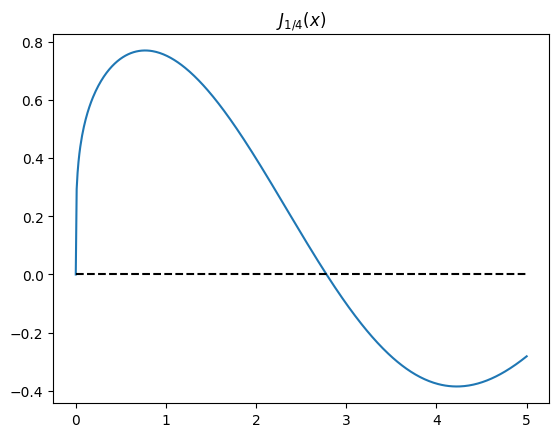

In [176]:
print("To locate the roots of the bessel function, first we make a plot")
xs = np.linspace(0.0, 5.0, 500)
ys = [besselj(Rational(1,4), x).evalf() for x in xs]
zero = np.zeros(len(xs))
plt.plot(xs, ys)
plt.plot(xs, zero, '--', color='black')
plt.title(r"$J_{1/4}(x)$")
plt.show()

In [185]:
print("There are roots at 0 and around 2.7. The root at 0 leads to trivial solution P=0. So we look for the other solution")

def newton_iteration(f, fprime, guess):
    # f(guess) + delta*fprime(guess) = 0
    # delta*fprime(guess) = -f(guess)
    # delta = -f(guess)/fprime(guess)
    return guess + -f(guess)/fprime(guess)

f = lambda x: besselj(Rational(1,4), x).evalf()
fprime = lambda x: diff(besselj(Rational(1,4), s), s).subs(s, x).evalf()

guess = 2.7
for i in range(100):
    guess = newton_iteration(f, fprime, guess)
    
root = guess
    
print(f"After {i+1} Newton Iterations, guessed root = {root}")


There are roots at 0 and around 2.7. The root at 0 leads to trivial solution P=0. So we look for the other solution
After 100 Newton Iterations, guessed root = 2.78088772399498


In [201]:
# Now solve for P
print("Now we have")
display_eq(r"\beta_1 l^2/2", root)
display_eq(r"\frac{P}{\sqrt{E I_\eta C}}l^2/2", root)

print("\n\nSolving for P")
display_eq(r"P", latex((2*root) * sqrt(E* I_eta* C) / l**2))


Now we have


<IPython.core.display.Math object>

<IPython.core.display.Math object>



Solving for P


<IPython.core.display.Math object>